In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as pyplot


 # Reading Data file

In [2]:
data = pd.read_csv("roma_calibrated.csv")
data = data[['id','lat_y','long_x']]


 # Removing all duplicates belonging to the same ID

In [3]:
data.drop_duplicates(subset=['id','lat_y','long_x'], keep=False, inplace = True)
data.shape


(2235826, 3)

 # Data to be clustered

In [3]:
cluster_data = np.array(data[['lat_y', 'long_x']])


 # Clustering the database with XMeans using PyClustering

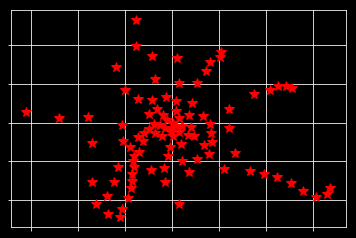

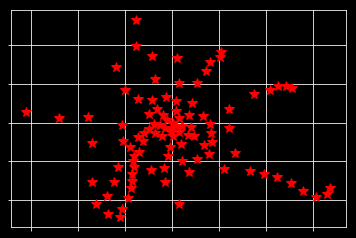

In [68]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

amount_initial_centers = 2

# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
initial_centers = kmeans_plusplus_initializer(cluster_data, amount_initial_centers).initialize()

# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(cluster_data, initial_centers, 100)
xmeans_instance.process()

# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

# Visualize clustering results
visualizer = cluster_visualizer()
#visualizer.append_clusters(clusters, cluster_data)
visualizer.append_cluster(centers, None, marker='*', markersize=10)
visualizer.show()




 # Clustering using XMeans once more trying to find better results on the previous centers

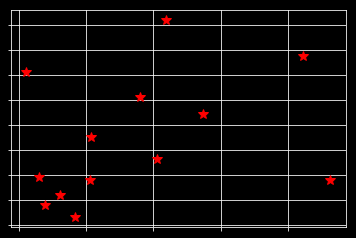

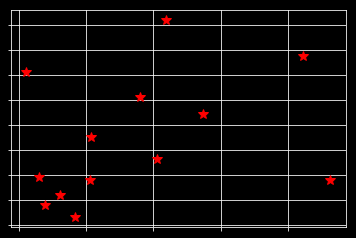

In [69]:
amount_initial_centers = 10

# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
initial_centers = kmeans_plusplus_initializer(centers, amount_initial_centers).initialize()

# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(centers, initial_centers, 100)
xmeans_instance.process()

# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

# Visualize clustering results
visualizer = cluster_visualizer()
#visualizer.append_clusters(clusters, cluster_data)
visualizer.append_cluster(centers, None, marker='*', markersize=10)
visualizer.show()


 # Saving clusters into a csv

In [70]:
centers_df = pd.DataFrame(data = centers)
centers_df.to_csv('clusters.csv')


# Applying Voronoi Diagram to the database 

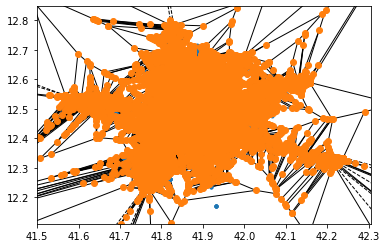

In [4]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import numpy as np

vor = Voronoi(cluster_data)

fig = voronoi_plot_2d(vor)
plt.show()

## Number of Regions
Get the number of regions generated by Voronoi Diagram. Each seed is a possible region of interest

In [8]:
len(vor.regions)

391929

In [7]:


for i, reg in enumerate(vor.regions):

    print ('Region:', i)
    print ('Indices of vertices of Voronoi region:', reg)
    print ('Associated point:', np.where(vor.point_region == i)[0][0], '\n')

Region: 0
Indices of vertices of Voronoi region: [44, 41, 42, 13, 43]
Associated point: 548159 

Region: 1
Indices of vertices of Voronoi region: [49, 46, 6, 18, 19, 47]
Associated point: 548197 

Region: 2
Indices of vertices of Voronoi region: [70, 68, 67, 69]
Associated point: 39875 

Region: 3
Indices of vertices of Voronoi region: [76, 74, 73, 75]
Associated point: 252499 

Region: 4
Indices of vertices of Voronoi region: [75, 72, 3, 10, 73]
Associated point: 252500 

Region: 5
Indices of vertices of Voronoi region: [84, 82, 81, 83]
Associated point: 2253424 

Region: 6
Indices of vertices of Voronoi region: [83, 4, 28, 78, 77, 81]
Associated point: 61928 

Region: 7
Indices of vertices of Voronoi region: [84, 29, 82]
Associated point: 61929 

Region: 8
Indices of vertices of Voronoi region: [101, 33, 89, 88, 100]
Associated point: 34625 

Region: 9
Indices of vertices of Voronoi region: [108, 37, -1, 21, 107]
Associated point: 299543 

Region: 10
Indices of vertices of Voronoi re

Associated point: 209647 

Region: 102
Indices of vertices of Voronoi region: [409, 404, 215, 407]
Associated point: 209646 

Region: 103
Indices of vertices of Voronoi region: [410, 405, 406, 404, 409]
Associated point: 3524065 

Region: 104
Indices of vertices of Voronoi region: [419, 417, 416, 418]
Associated point: 299546 

Region: 105
Indices of vertices of Voronoi region: [417, 222, 224, 219, 416]
Associated point: 299545 

Region: 106
Indices of vertices of Voronoi region: [418, 38, -1, 37, 219, 416]
Associated point: 303275 

Region: 107
Indices of vertices of Voronoi region: [419, 221, 222, 417]
Associated point: 3834561 

Region: 108
Indices of vertices of Voronoi region: [419, 221, 220, 157, 156, 96, 95, 38, 418]
Associated point: 299547 

Region: 109
Indices of vertices of Voronoi region: [421, 124, 227, 225, 229, 420]
Associated point: 540331 

Region: 110
Indices of vertices of Voronoi region: [422, 228, 124, 421]
Associated point: 540332 

Region: 111
Indices of vertices

Associated point: 2108157 

Region: 199
Indices of vertices of Voronoi region: [768, 444, 128, 130, 134, 131, 767]
Associated point: 548165 

Region: 200
Indices of vertices of Voronoi region: [770, 773, 772, 771, 769]
Associated point: 540340 

Region: 201
Indices of vertices of Voronoi region: [772, 707, 708, 773]
Associated point: 540327 

Region: 202
Indices of vertices of Voronoi region: [773, 424, 423, 708]
Associated point: 540335 

Region: 203
Indices of vertices of Voronoi region: [773, 125, 230, 424]
Associated point: 540336 

Region: 204
Indices of vertices of Voronoi region: [770, 51, 125, 773]
Associated point: 540337 

Region: 205
Indices of vertices of Voronoi region: [770, 51, 231, 725, 726, 427, 720, 719, 769]
Associated point: 540338 

Region: 206
Indices of vertices of Voronoi region: [772, 707, 706, 271, 270, 771]
Associated point: 540342 

Region: 207
Indices of vertices of Voronoi region: [777, 275, 274, 774]
Associated point: 2108163 

Region: 208
Indices of vert

Associated point: 39921 

Region: 295
Indices of vertices of Voronoi region: [1208, 1206, 1205, 1207]
Associated point: 727906 

Region: 296
Indices of vertices of Voronoi region: [1207, 694, 695, 413, 688, 687, 1205]
Associated point: 300773 

Region: 297
Indices of vertices of Voronoi region: [1218, 414, 1203, 1202, 1217]
Associated point: 5624 

Region: 298
Indices of vertices of Voronoi region: [1220, 414, 1218]
Associated point: 255532 

Region: 299
Indices of vertices of Voronoi region: [1236, 718, 716, 715, 233, 238, 1235]
Associated point: 540353 

Region: 300
Indices of vertices of Voronoi region: [1241, 1237, 1238, 1239, 1240]
Associated point: 540346 

Region: 301
Indices of vertices of Voronoi region: [1239, 729, 730, 728, 1238]
Associated point: 2772591 

Region: 302
Indices of vertices of Voronoi region: [1240, 229, 225, 226, 109, 729, 1239]
Associated point: 540345 

Region: 303
Indices of vertices of Voronoi region: [1246, 1244, 1245]
Associated point: 2108147 

Region:

Associated point: 231980 

Region: 392
Indices of vertices of Voronoi region: [1522, 1518, 1514, 1513, 872, 873, 874, 876, 875, 1521]
Associated point: 37904 

Region: 393
Indices of vertices of Voronoi region: [1530, 1528, 1525, 1523, 1524, 1527, 1526, 1529]
Associated point: 3347464 

Region: 394
Indices of vertices of Voronoi region: [1525, 881, 880, 1523]
Associated point: 37906 

Region: 395
Indices of vertices of Voronoi region: [1524, 1502, 1500, 880, 1523]
Associated point: 233543 

Region: 396
Indices of vertices of Voronoi region: [1527, 1501, 1503, 1502, 1524]
Associated point: 231977 

Region: 397
Indices of vertices of Voronoi region: [1534, 884, 885, 922, 921, 1533]
Associated point: 1139431 

Region: 398
Indices of vertices of Voronoi region: [1535, 1491, 1490, 919, 921, 1533]
Associated point: 177441 

Region: 399
Indices of vertices of Voronoi region: [1537, 898, 897, 896, 899, 1536]
Associated point: 1139426 

Region: 400
Indices of vertices of Voronoi region: [1540, 

Region: 470
Indices of vertices of Voronoi region: [1829, 1827, 1828]
Associated point: 727900 

Region: 471
Indices of vertices of Voronoi region: [1832, 1830, 1831]
Associated point: 727898 

Region: 472
Indices of vertices of Voronoi region: [1832, 1092, 1090, 1091, 1831]
Associated point: 248470 

Region: 473
Indices of vertices of Voronoi region: [1837, 1833, 1834, 1835, 1836]
Associated point: 2915935 

Region: 474
Indices of vertices of Voronoi region: [1837, 626, 625, 624, 623, 1833]
Associated point: 34332 

Region: 475
Indices of vertices of Voronoi region: [1834, 1094, 381, 623, 1833]
Associated point: 34334 

Region: 476
Indices of vertices of Voronoi region: [1835, 1093, 1095, 1094, 1834]
Associated point: 34335 

Region: 477
Indices of vertices of Voronoi region: [1836, 376, 627, 1093, 1835]
Associated point: 34331 

Region: 478
Indices of vertices of Voronoi region: [1837, 626, 622, 376, 1836]
Associated point: 34328 

Region: 479
Indices of vertices of Voronoi region: [

Associated point: 540389 

Region: 564
Indices of vertices of Voronoi region: [2112, 2106, 2105, 1301, 1302, 1305, 1304, 1303, 2111]
Associated point: 540394 

Region: 565
Indices of vertices of Voronoi region: [2113, 276, 277, 1303, 2111]
Associated point: 2108168 

Region: 566
Indices of vertices of Voronoi region: [2116, 2109, 2106, 2112]
Associated point: 2108167 

Region: 567
Indices of vertices of Voronoi region: [2114, 173, 172, 143, 276, 2113]
Associated point: 540390 

Region: 568
Indices of vertices of Voronoi region: [2116, 2109, 2110, 1297, 736, 1293, 1291, 732, 1248, 1247, 2115]
Associated point: 540356 

Region: 569
Indices of vertices of Voronoi region: [2128, 694, 1207, 1208, 692, 2127]
Associated point: 5623 

Region: 570
Indices of vertices of Voronoi region: [2129, 695, 694, 2128]
Associated point: 727907 

Region: 571
Indices of vertices of Voronoi region: [2130, 1223, 1221, 413, 695, 2129]
Associated point: 248464 

Region: 572
Indices of vertices of Voronoi region

Associated point: 2747215 

Region: 644
Indices of vertices of Voronoi region: [2404, 2401, 2400, 2402, 2403]
Associated point: 1139425 

Region: 645
Indices of vertices of Voronoi region: [2402, 883, 521, 1465, 1464, 2400]
Associated point: 177451 

Region: 646
Indices of vertices of Voronoi region: [2404, 1535, 1491, 1492, 1486, 1487, 2401]
Associated point: 177399 

Region: 647
Indices of vertices of Voronoi region: [2403, 1537, 898, 883, 2402]
Associated point: 177450 

Region: 648
Indices of vertices of Voronoi region: [2404, 1535, 1533, 1534, 1536, 1537, 2403]
Associated point: 177407 

Region: 649
Indices of vertices of Voronoi region: [2407, 1488, 1489, 1490, 1491, 1492, 2406]
Associated point: 177398 

Region: 650
Indices of vertices of Voronoi region: [2409, 1493, 1153, 1152, 870, 869, 2408]
Associated point: 177415 

Region: 651
Indices of vertices of Voronoi region: [2413, 1495, 920, 919, 1490, 1489, 1150, 2412]
Associated point: 177433 

Region: 652
Indices of vertices of 

IndexError: index 0 is out of bounds for axis 0 with size 0

## Trying to split map into matrixes

In [3]:
box = (data['lat_y'].min(), data['long_x'].min(),
      data['lat_y'].max(), data['long_x'].max())

In [4]:
box

(41.5660477041628, 12.1712615992874, 42.2393299814301, 12.7864216808737)

In [11]:
import numpy as np
import pandas as pd
import geopy.distance

data = pd.read_csv("roma_calibrated.csv")
data = data[['id','lat_y','long_x']]

box = (data['lat_y'].min(), data['long_x'].min(),
      data['lat_y'].max(), data['long_x'].max())

coord_upper_left   = (box[0], box[3])
coord_bottom_left  = (box[0], box[1])
coord_upper_right  = (box[2], box[3])
coord_bottom_right = (box[2], box[1])

x_axis = geopy.distance.vincenty(coord_upper_left, coord_upper_right).km
y_axis = geopy.distance.vincenty(coord_upper_left, coord_bottom_left).km

n_regions_x = x_axis // 0.5
n_regions_y = y_axis // 0.5




C:\Users\Gabriel\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  app.launch_new_instance()
C:\Users\Gabriel\Miniconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.


149.0

102.0